In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [353]:
df = pd.read_excel("Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [354]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [355]:
df = df.drop(["Unnamed: 0"],axis = 1)

In [356]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [357]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [358]:
#Data type of data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [359]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [360]:
#Making different list for categorical columns and numerical columns
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [361]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [362]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [363]:
#unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [364]:
#Are there any duplicate records, Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [367]:
df.drop_duplicates(inplace=True)

In [369]:

df[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


Univariate Analysis

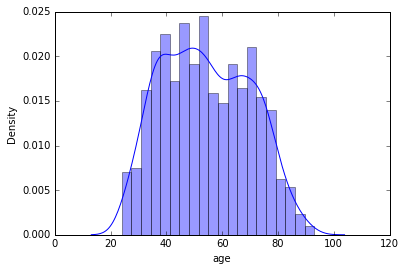

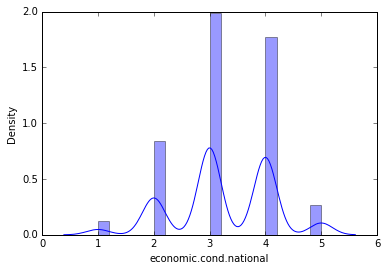

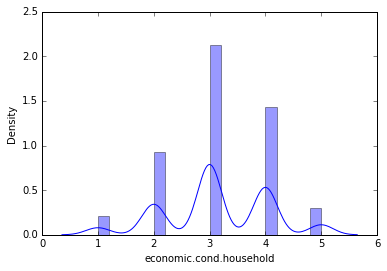

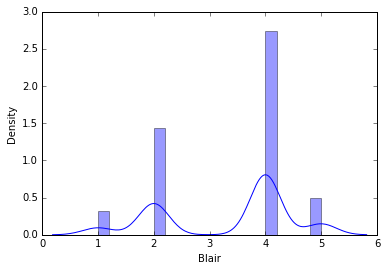

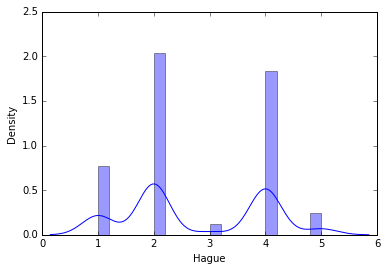

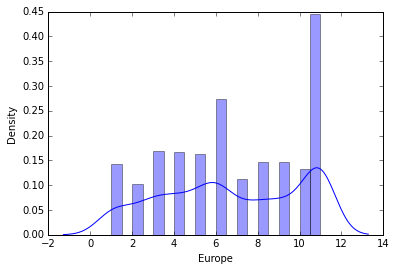

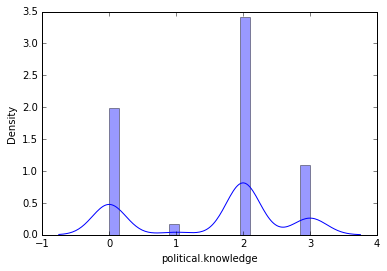

In [158]:
for column in df[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']]: 

    sns.distplot(df[column],bins=20)
    plt.show()

Bivariate and Multivariate Analysis

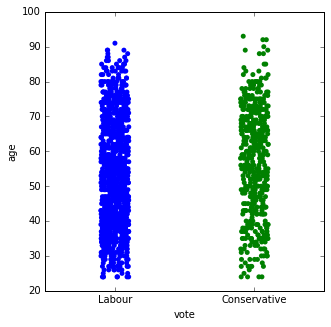

In [159]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

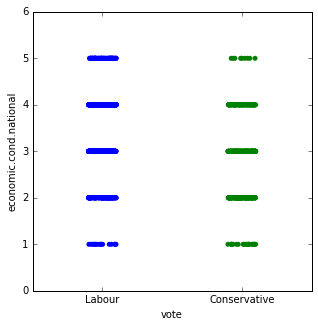

In [160]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

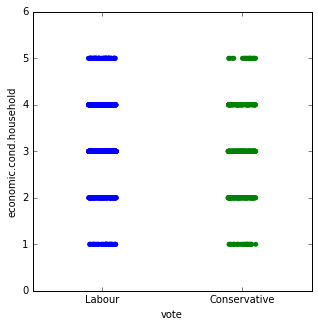

In [161]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

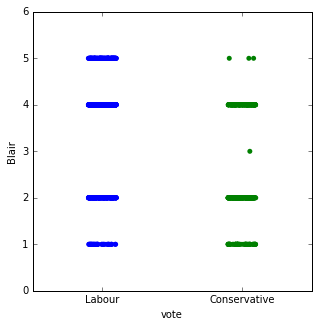

In [162]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

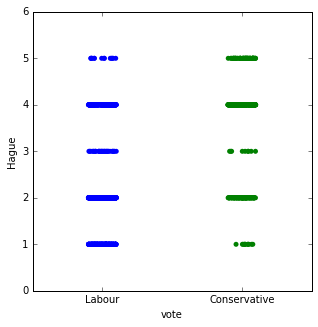

In [163]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

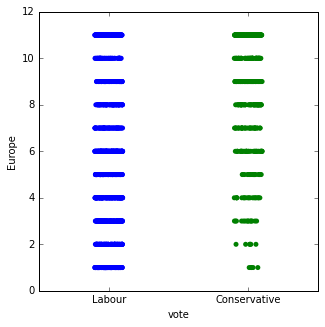

In [164]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

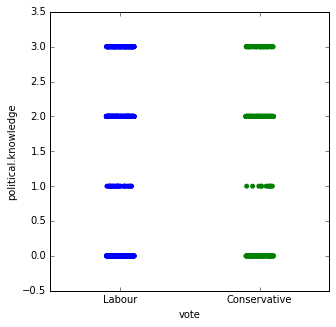

In [165]:
plt.figure(figsize=(5,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

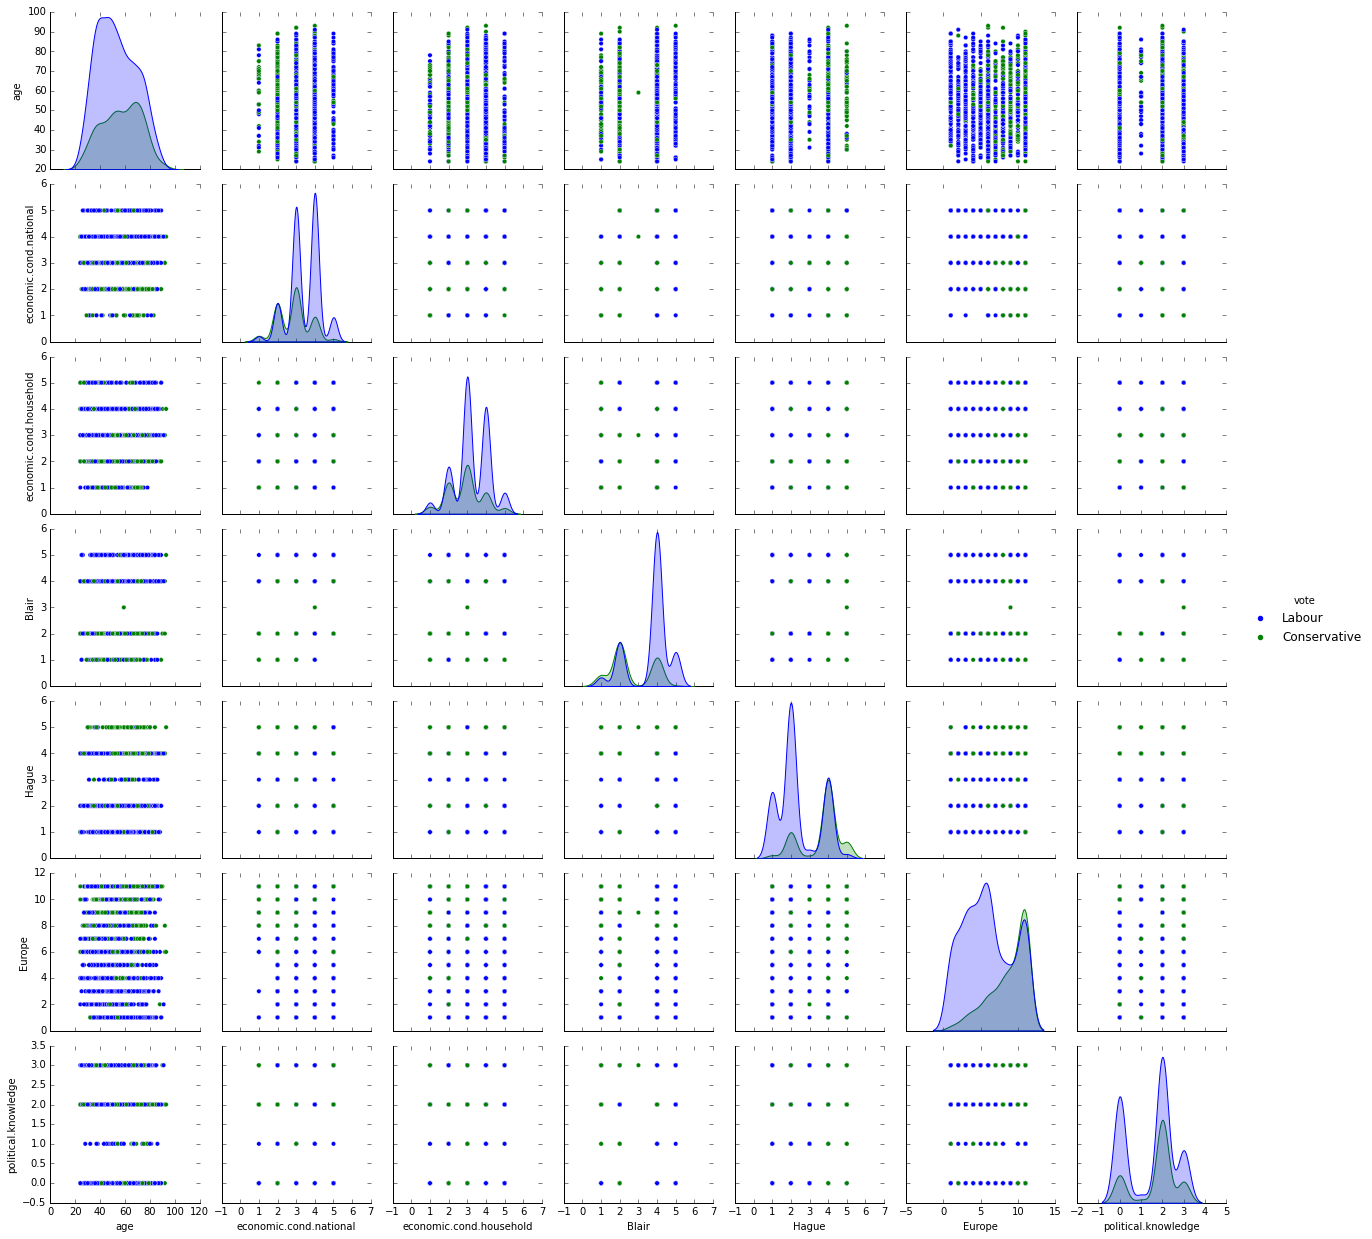

In [166]:
sns.pairplot(df,hue="vote")

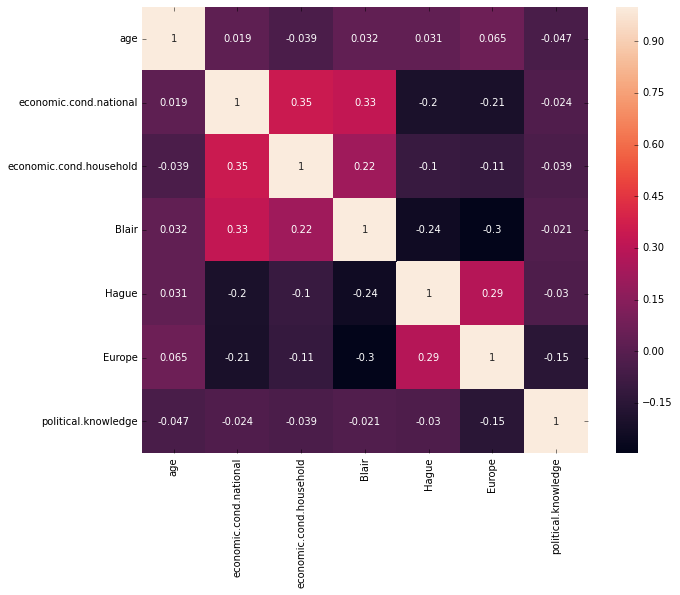

In [167]:
#Correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


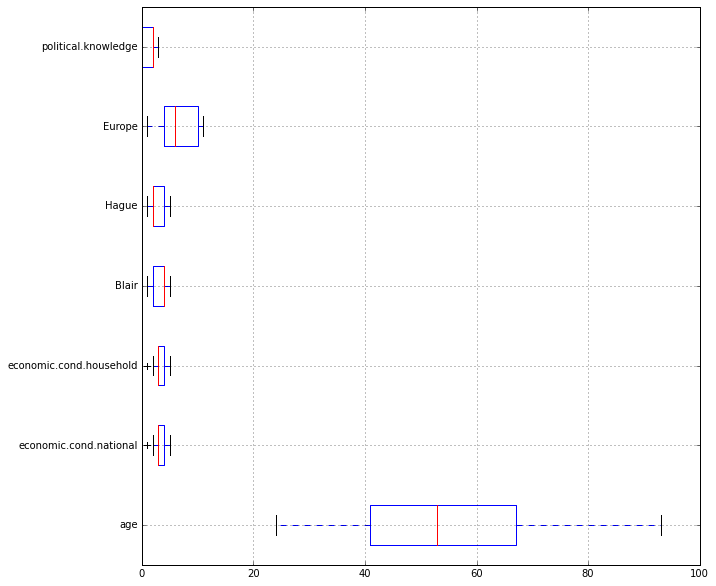

In [168]:
#Checking Outliers
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [169]:
def find_whiskers(col):
    sorted(col)
    Q1 , Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range , upper_range

for col in ['economic.cond.national', 'economic.cond.household']:
    lwrange , uprange = find_whiskers(df[col])
    df[col] = np.where(df[col] > uprange , uprange , df[col])
    df[col] = np.where(df[col] < lwrange , lwrange , df[col])

<AxesSubplot:>

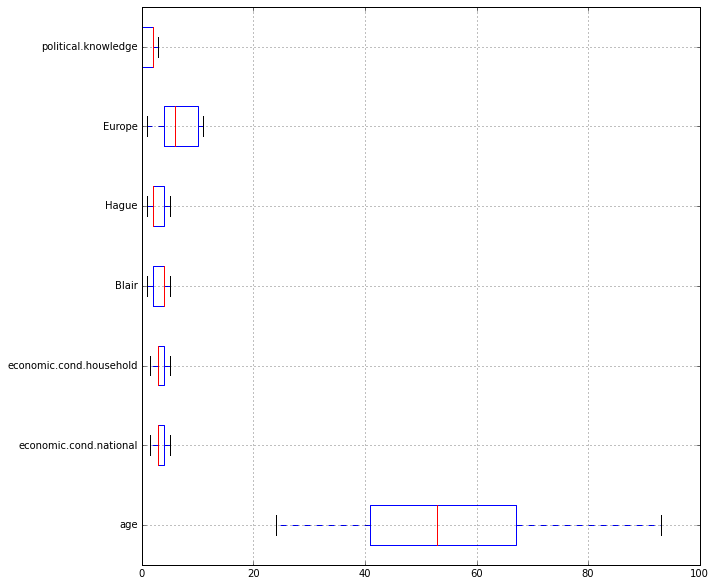

In [170]:
#Boxplot after outlier treatment

plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

In [171]:
#Encode the data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [172]:
df['vote'] = labelencoder.fit_transform(df.vote)
df['gender'] = labelencoder.fit_transform(df.gender)


In [173]:
df.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1
2,1,35,4.0,4.0,5,2,3,2,1
3,1,24,4.0,2.0,2,1,4,0,0
4,1,41,2.0,2.0,1,1,6,2,1


In [174]:
#Scaling 
from scipy.stats import zscore
data = df.apply(zscore)
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.659692,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,0.659692,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,0.659692,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,0.659692,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,0.659692,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


Train-Test Split

In [175]:
x = df.drop('vote', axis=1)
y = df['vote']


In [176]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

Modelling:
1. Apply Logistic Regression and LDA (linear discriminant analysis)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [188]:
log = LogisticRegression()
log.fit(x_train, y_train)


LogisticRegression()

In [190]:
## Performance Matrix on train data set
y_train_predict = log.predict(x_train)
log_train_score = log.score(x_train, y_train)
print(log_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[197 110]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [191]:
## Performance Matrix on test data set
y_test_predict = log.predict(x_test)
log_test_score = log.score(x_test, y_test)
print(log_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[112  41]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.87      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [185]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [192]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(x_train,y_train)

In [193]:
## Performance Matrix on train data set
y_train_predict = lda.predict(x_train)
lda_train_score = lda.score(x_train, y_train)
print(log_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [194]:
## Performance Matrix on test data set
y_test_predict = lda.predict(x_test)
lda_test_score = lda.score(x_test, y_test)
print(log_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



2. Apply KNN Model and Naïve Bayes Model.

Naive Bayes Model

In [195]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [197]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [199]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(x_train)
NB_train_score = NB_model.score(x_train, y_train)
print(NB_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [200]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(x_test)
NB_test_score = NB_model.score(x_test, y_test)
print(NB_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



KNN Model

In [202]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [203]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
KNN_train_score = KNN_model.score(x_train, y_train)
print(KNN_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[204 103]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [204]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
KNN_test_score = KNN_model.score(x_test, y_test)
print(KNN_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. 

Model Tuning

Decision Tree

In [252]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [253]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
DT_train_score = DT_model.score(x_train, y_train)
print(DT_train_score)

print(metrics.confusion_matrix(y_train, y_train_predict))

print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [254]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
DT_test_score = DT_model.score(x_test, y_test)
print(DT_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[106  47]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       153
           1       0.85      0.87      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)


RandomForestClassifier(random_state=1)

In [257]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
rf_train_score =RF_model.score(x_train, y_train)
print(rf_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [213]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
rf_test_score = RF_model.score(x_test, y_test)
print(rf_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Bagging

In [215]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [216]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train)
bagg_train_score =Bagging_model.score(x_train, y_train)
print(bagg_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[277  30]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [217]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
bagg_test_score = Bagging_model.score(x_test, y_test)
print(bagg_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Boosting

Ada Boost

In [218]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [219]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
ABB_train_score = ADB_model.score(x_train, y_train)
print(ABB_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [220]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
ABB_test_score = ADB_model.score(x_test, y_test)
print(ABB_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



Gradient Boosting

In [222]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [223]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train)
GBC_train_score = gbcl.score(x_train, y_train)
print(GBC_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [224]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(x_test)
GBC_test_score = gbcl.score(x_test, y_test)
print(GBC_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



4. Plot ROC curve and get ROC_AUC score for each model.

Logistic Regression 

AUC: 0.890


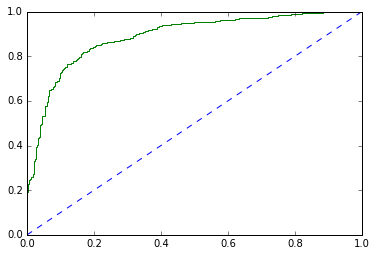

In [261]:
#Train data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

probs = log.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.883


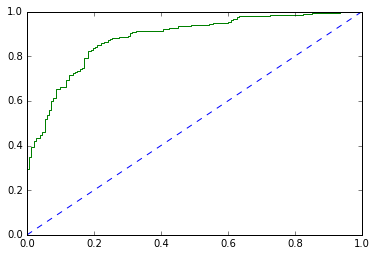

In [263]:
#Test data

probs = log.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

LDA

AUC: 0.890


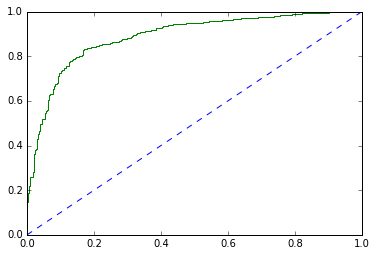

In [264]:
#Train data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

probs = lda.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.888


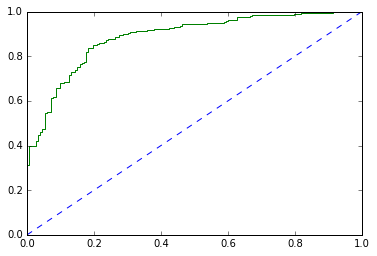

In [265]:
#Test data

probs = lda.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Naive Bayes Model

AUC: 0.889


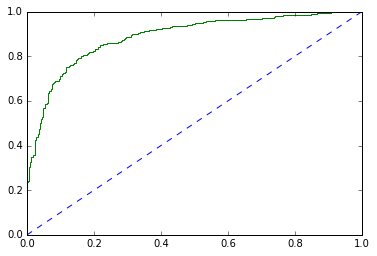

In [269]:
#Train data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

probs = NB_model.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.876


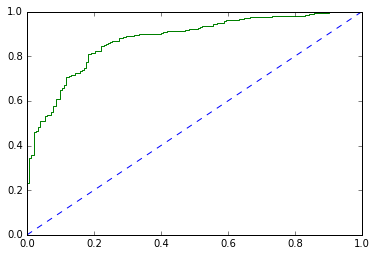

In [268]:
#Test data

probs = NB_model.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

KNN Model

AUC: 0.923


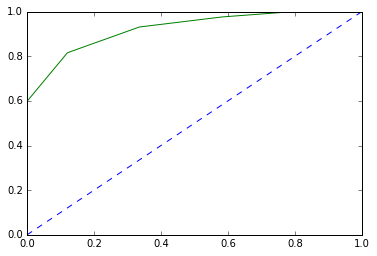

In [270]:
#Train data

probs = KNN_model.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.853


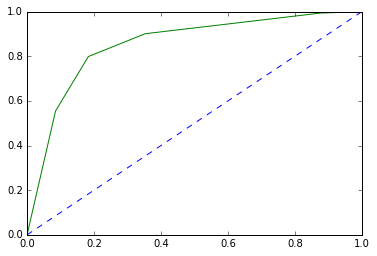

In [271]:
#Test data

probs = KNN_model.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Decision Tree

AUC: 1.000


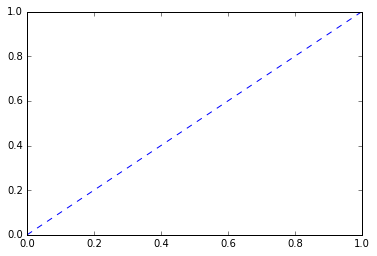

In [272]:
#Train data

probs = DT_model.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.782


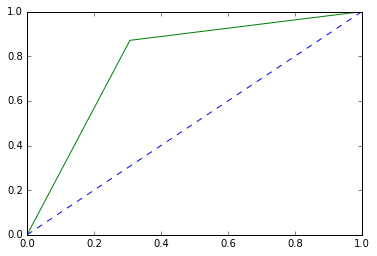

In [273]:
#Test data

probs = DT_model.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Random Forest

AUC: 1.000


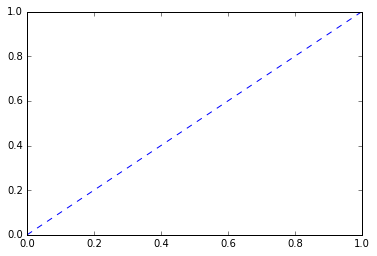

In [274]:
#Train data

probs = RF_model.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.895


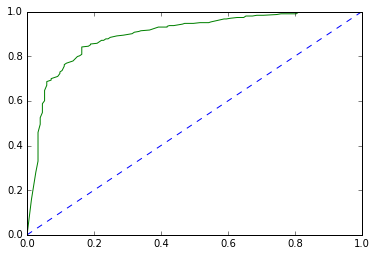

In [275]:
#Test data

probs = RF_model.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Bagging

AUC: 0.997


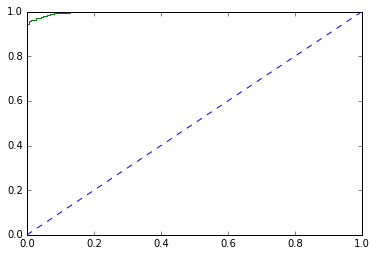

In [276]:
#Train data

probs = Bagging_model.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.897


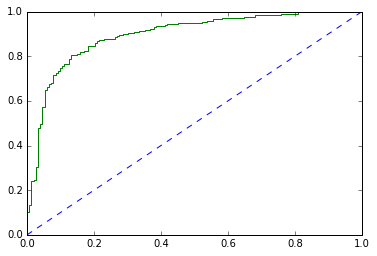

In [277]:
#Test data

probs = Bagging_model.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Ada Boost

AUC: 0.915


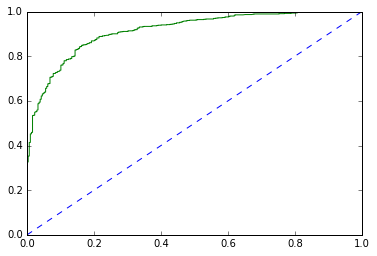

In [278]:
#Train data

probs = ADB_model.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.877


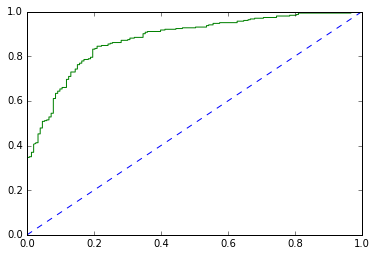

In [279]:
#Test data

probs = ADB_model.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Gradient Boost

AUC: 0.951


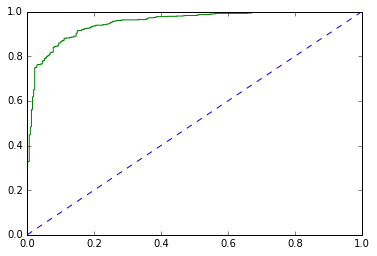

In [284]:
#Train data

probs = gbcl.predict_proba(x_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.899


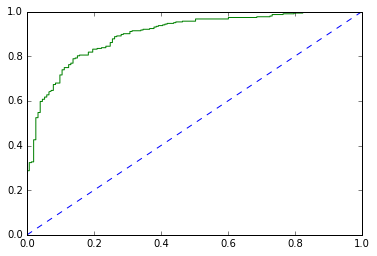

In [285]:
#Test data

probs = gbcl.predict_proba(x_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

Inference :
1. Based on these predictions, what are the insights?

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [7]:
import nltk
import random
import string
import re

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import inaugural

In [11]:
inaugural.fileids()


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [12]:
inaugural.raw('1941-Roosevelt.txt')


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [13]:
inaugural.raw('1961-Kennedy.txt')


'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [14]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [15]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [16]:
import pandas as pd
speech = pd.DataFrame({"Speech":[Roosevelt,Kennedy,Nixon],"Sentiment":["Positive","Negative","Positive"]})

In [17]:
speech

,Speech,Sentiment
0,On each national day of inauguration since 178...,Positive
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Negative
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Positive


2.1) Find the number of characters, words and sentences for the mentioned documents. 

Number of words

In [18]:
speech['totalwords'] = [len(x.split()) for x in speech['Speech'].tolist()]
speech[['Speech','totalwords']].head()

,Speech,totalwords
0,On each national day of inauguration since 178...,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [19]:
speech['word_count'] = speech['Speech'].apply(lambda x: len(str(x).split(" ")))
speech[['Speech','word_count']].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


Number of Characters- including spaces

In [20]:
speech['char_count'] = speech['Speech'].str.len()
speech[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


2.2) Remove all the stopwords from the three speeches.

Removal of StopWords

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech['Speech'].head()

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Speech, dtype: object

In [22]:
#Lower Case conversion
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech['Speech'].head()

0    on national day inauguration since 1789, peopl...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [23]:
#Removal of Punctuation
speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')
speech['Speech'].head()

0    on national day inauguration since 1789 people...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [24]:
#Common Words Removal
freq = pd.Series(' '.join(speech['Speech']).split()).value_counts()[:10]
freq

us         46
let        39
world      27
new        26
peace      23
we         22
america    22
nation     21
i          18
it         16
dtype: int64

In [25]:
#Rare Words Removal
freq = pd.Series(' '.join(speech['Speech']).split()).value_counts()[-10:]
freq

quickly        1
interlude      1
humane         1
framework      1
house          1
improvement    1
farreaching    1
corners        1
treaty         1
understands    1
dtype: int64

In [26]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
speech['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    on nation day inaugur sinc 1789 peopl renew se...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [50]:
nltk.FreqDist(speech.words()).most_common(10)

AttributeError: 'DataFrame' object has no attribute 'words'

2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [27]:
speech['Speech'].iloc[30:31]

Series([], Name: Speech, dtype: object)

In [28]:
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [29]:
corpus = speech['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [30]:
wc_a = ' '.join(corpus)

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


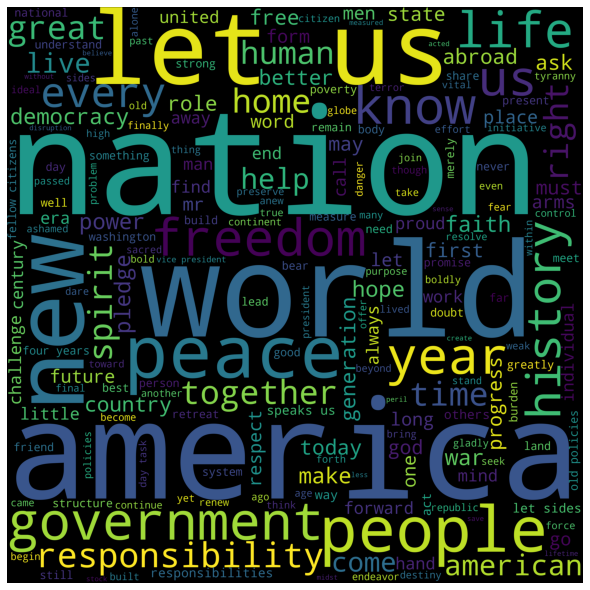

In [34]:
# Word Cloud 
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 


plt.show()